# Activation Functions

## Sigmoid

We learned this week that Sigmoid has squashing effect, that is, it takes any input between (-inf,inf) and gives an output in the range [0,1].  This is an important piece of converting linear regression to logistic regression.  Sigmoid is often used as an activation function in the output ( or final layer) of a feedforward neural network designed to solve a binary (or multi-label) classificaiton problem. In such networks, the output of sigmoid is interpreted as the predicted probability that a given input belongs to one of the two target classes.

Mathematically, sigmoid looks like this:

$$f(z) = \frac{1}{1+e^{-z}}$$

Lets plot sigmoid:

In [109]:
from math import e
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [110]:
def sigmoid(z):
    y = 1 / (1 + e ** -z)
    return y

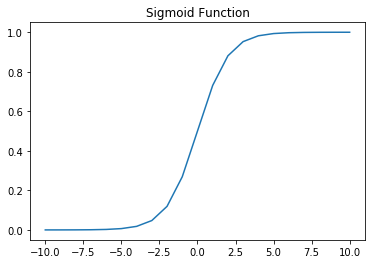

In [111]:
z = np.arange(-10, 11, 1)  # creates array [-10, 9, .., 9, 10]
plt.plot(z,sigmoid(z))
plt.title("Sigmoid Function")
plt.show()

The learning algorithm in neural network uses *gradient descent*. It is an optimization algorithm that uses the direction and magnitude of derivatives of the loss function with respect to the network's parameters to make incremental steps towards finding the optimal parameters.
We will talk about gradient descent in detail in the next module. For now,  let's take a look at the derivative of the sigmoid.
The derivative of sigmoid is calculated as follows:
$$ f'(z)=\frac{d}{dz}(sigmoid(z))=\frac{e^{-z}}{({1+e^{-z}})^2}$$
We can further simplify this as follows:
$$\frac{e^{-z}}{({1+e^{-z}})^2}=\frac{1}{1+e^{-z}}\times\frac{e^{-z}+1-1}{1+e^{-z}}=\frac{1}{1+e^{-z}}(\frac{e^{-z}+1}{1+e^{-z}}-\frac{1}{1+e^{-z}})= sigmoid(z)(1-sigmoid(z))$$

Let's plot this derivative:



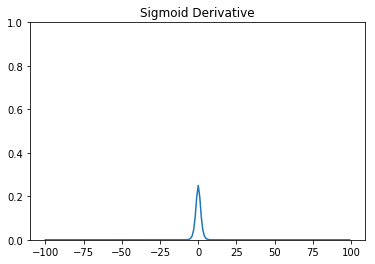

In [78]:
z= np.arange(-100,100,1)
dsigmoid = sigmoid(z)*(1-sigmoid(z))
plt.ylim((0,1))
plt.plot(z,dsigmoid)
plt.title("Sigmoid Derivative")
plt.show()


As you can see sigmoid's dervative is near zero everywhere excecpt for a very narrow interval around zer0.

## Tanh
As discussed in the lecture hyperbolic tangent is another activation function with squashing effect and is defined as follows:
    $$f(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$
unlike sigmoid, tanh outputs a value in the range [-1,1]. Let's plot tanh
    

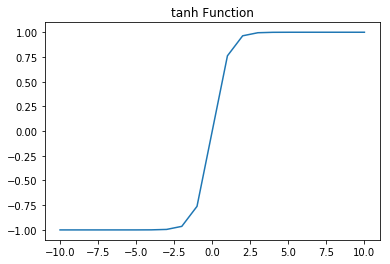

In [79]:
#defining tanh
def tanh(z):
    y = (e ** z - e ** -z) / (e ** z + e ** -z)
    return y
#plotting tanh
z = np.arange(-10, 11, 1)  # creates array [-10, 9, .., 9, 10]
plt.plot(z,tanh(z))
plt.title("tanh Function")
plt.show()

The derivative of tanh is computed as follows:
$$f'(z)=\frac{d}{dz}tanh(z)=\frac{(e^z+e^{-z})(e^z+e^{-z})-(e^z-e^{-z})(e^z-e^{-z})}{(e^z+e^{-z})^2}=1-tanh(z)^2$$

Let's plot this derivative:

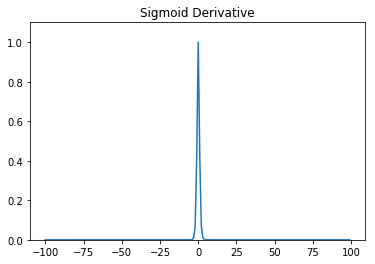

In [112]:
z= np.arange(-100,100,1)
dtanh = 1- tanh(z)**2
#ylim sets the y axis limits
plt.ylim((0,1.1))
plt.plot(z,dtanh)
plt.title("Sigmoid Derivative")
plt.show()

Similar to sigmoid the derivative of tanh is nearly zero everywhere except for a narrow interval around zero . However, it has a stronger derivative compared to sigmoid in that interval. 
Tanh is frequently used as activation of hidden units in a recurrent neural network. We will talk about recurrent neural networks in a later module.

# RELU

Another popular activation function is relu, or rectified linear unit activation. Relu is the most popular choice for the activation of the hidden units in a feedforward neural network.

It's defined mathematically like this:

$$f(x) = \max(0,x)$$


Relu has a really easy derivative, it's either 0 or 1. This makes it desirable computationally as activation function.

Derivative of Relu is stronger than both sigmoid and tanh which makes it a more desirable activation function for hidden layers in a deep neural networks.  Let's plot relu and its derivative

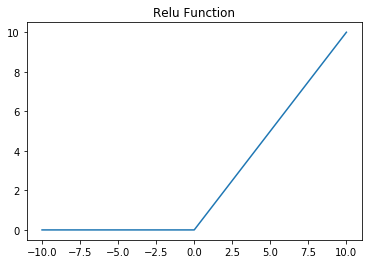

In [84]:
def relu(z):
    y=np.maximum(0,z)
    return y
z = np.arange(-10, 11, 1)  # creates array [-10, 9, .., 9, 10]
plt.plot(z,relu(z))
plt.title("Relu Function")
plt.show()

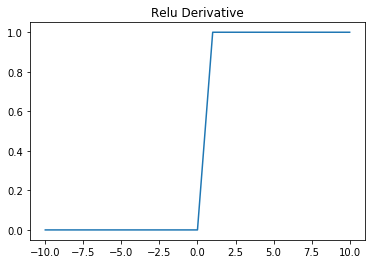

In [86]:
#np.where returns 0 if z<=0 else return 1.0
drelu=np.where(z<=0, 0.0, 1.0)
plt.plot(z,drelu)
plt.title("Relu Derivative")
plt.show()

## Leaky Relu

Leaky relu was proposed to address a problem known as "dying relu". When the input to relu is less than zero, neruon outpus zero and essentially becomes inactive. ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs and can get stuck in that state.  Leaky relu tries to address this problem by letting some information flow when the input is negative.
leaky relu is defined as follows:
        $$lrelu(z)=max(\alpha z, z)$$
 Where $\alpha$ is a constant between 0 and 1 such as $\alpha =0.001$
 
 The derivative of lrelu is 1 when $z>0$ and $\alpha$ when $z<=0$
 
 Let's plot leaky relu and its derivative.

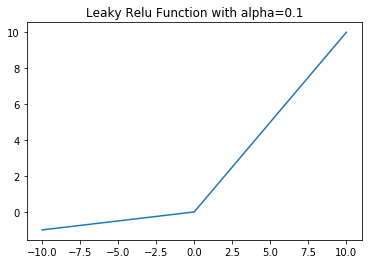

In [96]:
def lrelu(z, alpha):
    y=np.maximum(alpha*z,z)
    return y
z = np.arange(-10, 11, 1)  # creates array [-10, 9, .., 9, 10]
alpha=0.1
plt.plot(z,lrelu(z,alpha))
plt.title("Leaky Relu Function with alpha=0.1")
plt.show()

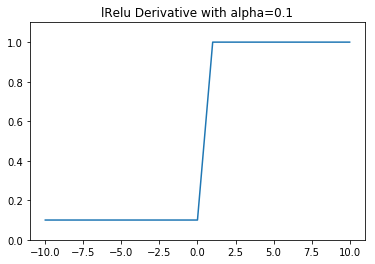

In [104]:
alpha=0.1
dlrelu=np.where(z<=0, alpha,1 )
plt.ylim(0,1.1)
plt.plot(z,dlrelu)
plt.title("lRelu Derivative with alpha=0.1")
plt.show()